# Pymaceuticals Inc.
---

### Analysis

---Findings---

-Mice treated with Capomulin and Ramicane had the lowest average tumor size, showing increased effectiveness of this drug in shrinking tumor size of tested mice. These mice also had the most timepoint data, which could indicate increased longevity of the mice on this drug. 

-Of the 4 drugs selected for increased analysis (Capomulin, Ramicane, Infubinol, and Ceftamin), only Infubinol had an outlier past the lower bound. This could be due to increased effectiveness of Infubinol in certain individuals, a naturally lower tumor growth speed, or the weight of the mouse was low compared to other tested individuals.

-Weight has a strong positive correlation with tumor size. This can indicate the natural growth speed of the mice also has a positive effect on tumor growth to varying degrees. 

---Considerations---

-Not all mice had the same amount of timepoint data, meaning some of the mice didn't finish the full 45 day drug regiment (mouse b447 had only 1 timepoint). This could be due to premature death of mice, or inability to obtain data from the mice during later timepoints. This can skew final analysis of the drugs.

-Only 4 drugs were selected for further analysis. Other drugs might show valuable insight for further experiments, so further analysis is needed for the full picture comparisons.

---Future Research---

-The analysis in metastatic sites could provide more information on the effectiveness of the drugs. Conclusions drawn from tumor size might be misleading in overall drug effectiveness, as quickly metastasizing tumors could lead to early mouse morbidity. 


In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
total_mice = len(merge_df["Mouse ID"].unique())
total_mice

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = merge_df[merge_df.duplicated()]
dup_mouse_ID = dup_mouse["Mouse ID"].loc[dup_mouse.index[0]]
dup_mouse["Mouse ID"]

137    g989
Name: Mouse ID, dtype: object

In [60]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_data = merge_df[merge_df["Mouse ID"] == dup_mouse_ID]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != dup_mouse_ID]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_reg = clean_df.groupby(["Drug Regimen"])
drug_mean = drug_reg["Tumor Volume (mm3)"].mean()
drug_median =  drug_reg["Tumor Volume (mm3)"].median()
drug_var = drug_reg["Tumor Volume (mm3)"].var()
drug_std = drug_reg["Tumor Volume (mm3)"].std()
drug_sem = drug_reg["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                             "Median Tumor Volume": drug_median,
                             "Tumor Volume Variance": drug_var,
                             "Tumor Volume Std. Dev.": drug_std,
                             "Tumor Volume Std. Err.": drug_sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = drug_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

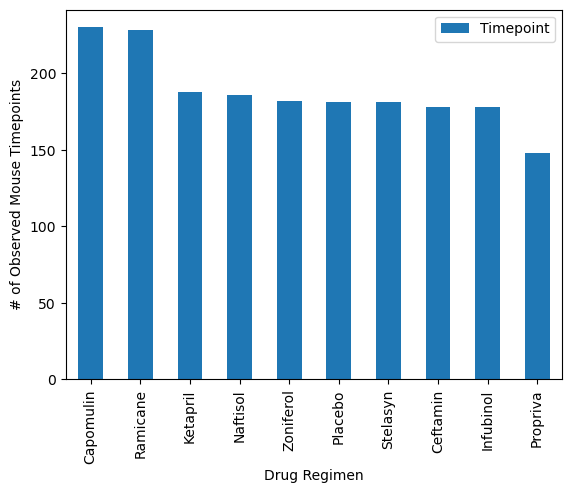

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoin=ts) for each drug regimen using Pandas.
time_count = pd.DataFrame(drug_reg["Timepoint"].count())
sort_time_count = time_count.sort_values(by="Timepoint", ascending=False)
sort_time_count.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")

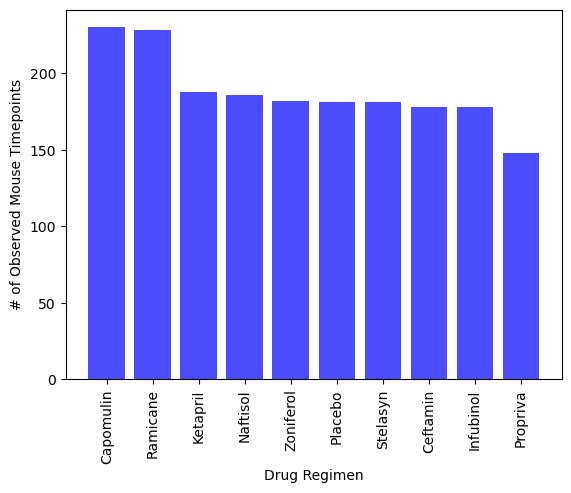

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=sort_time_count.index, height=sort_time_count["Timepoint"], alpha=0.7, color="b")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

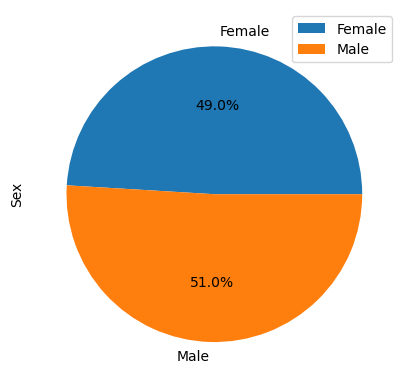

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_df = pd.DataFrame(clean_df.groupby("Sex")["Sex"].count())

# Make the pie chart
pie_df.plot(kind="pie", autopct="%1.1f%%", subplots=True)

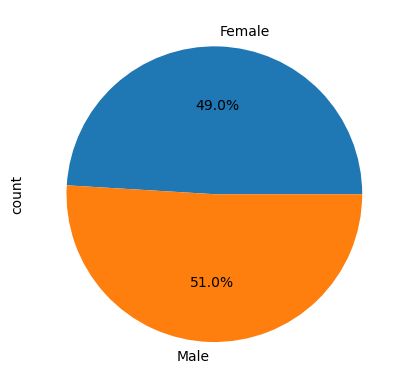

In [68]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_count = clean_df.groupby("Sex")["Sex"].count()
pie_label = pie_count.index

# Make the pie chart
plt.pie(pie_count, labels=pie_label, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
print(f"{max_timepoint.head()}")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_clean_df = pd.merge(max_timepoint, clean_df, how="left", on=["Mouse ID", "Timepoint"])
max_clean_df = max_clean_df.reset_index(drop=True)


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in max_clean_df.index:
    if max_clean_df["Drug Regimen"][drug] == drugs[0]:
        capomulin.append(max_clean_df["Tumor Volume (mm3)"][drug])
    if max_clean_df["Drug Regimen"][drug] == drugs[1]:
        ramicane.append(max_clean_df["Tumor Volume (mm3)"][drug])
    if max_clean_df["Drug Regimen"][drug] == drugs[2]:
        infubinol.append(max_clean_df["Tumor Volume (mm3)"][drug])
    if max_clean_df["Drug Regimen"][drug] == drugs[3]:
        ceftamin.append(max_clean_df["Tumor Volume (mm3)"][drug])

# add subset
drugs_df = pd.DataFrame({drugs[0]: capomulin,
                         drugs[1]: ramicane,
                         drugs[2]: infubinol,
                         drugs[3]: ceftamin})

# Determine outliers using upper and lower bounds
# Capomulin
quart_cap = drugs_df[drugs[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
up_cap = quart_cap[.75]
iqr_cap = up_cap - low_cap
low_bound_cap = low_cap - (1.5*iqr_cap)
up_bound_cap = up_cap + (1.5*iqr_cap)
cap_outlier = []
print(f"IQR for Capomulin is from {round(low_bound_cap, 2)} to {round(up_bound_cap, 2)}.")

for medication in drugs_df[drugs[0]]:
    if medication > up_bound_cap or medication < low_bound_cap:
        cap_outlier.append(medication)
print(f"Capomulin's potential outliers: {cap_outlier}")

# Ramicane
quart_ram = drugs_df[drugs[1]].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
up_ram = quart_ram[.75]
iqr_ram = up_ram - low_ram
low_bound_ram = low_ram - (1.5*iqr_ram)
up_bound_ram = up_ram + (1.5*iqr_ram)
ram_outlier = []
print(f"IQR for Ramicane is from {round(low_bound_ram, 2)} to {round(up_bound_ram, 2)}.")

for medication in drugs_df[drugs[1]]:
    if medication > up_bound_ram or medication < low_bound_ram:
        ram_outlier.append(medication)
print(f"Ramicane's potential outliers: {ram_outlier}")

# Infubinol
quart_inf = drugs_df[drugs[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
up_inf = quart_inf[.75]
iqr_inf = up_inf - low_inf
low_bound_inf = low_inf - (1.5*iqr_inf)
up_bound_inf = up_inf + (1.5*iqr_inf)
inf_outlier = []
print(f"IQR for Infubinol is from {round(low_bound_inf, 2)} to {round(up_bound_inf, 2)}.")

for medication in drugs_df[drugs[2]]:
    if medication > up_bound_inf or medication < low_bound_inf:
        inf_outlier.append(medication)
print(f"Infubinol's potential outliers: {inf_outlier}")

# Ceftamin
quart_cef = drugs_df[drugs[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
up_cef = quart_cef[.75]
iqr_cef = up_cef - low_cef
low_bound_cef = low_cef - (1.5*iqr_cef)
up_bound_cef = up_cef + (1.5*iqr_cef)
cef_outlier = []
print(f"IQR for Ceftamin is from {round(low_bound_cef, 2)} to {round(up_bound_cef, 2)}.")

for medication in drugs_df[drugs[3]]:
    if medication > up_bound_cef or medication < low_bound_cef:
        cef_outlier.append(medication)
print(f"Ceftamin's potential outliers: {cef_outlier}")


IQR for Capomulin is from 20.7 to 51.83.
Capomulin's potential outliers: []
IQR for Ramicane is from 17.91 to 54.31.
Ramicane's potential outliers: []
IQR for Infubinol is from 36.83 to 82.74.
Infubinol's potential outliers: [36.3213458]
IQR for Ceftamin is from 25.36 to 87.67.
Ceftamin's potential outliers: []


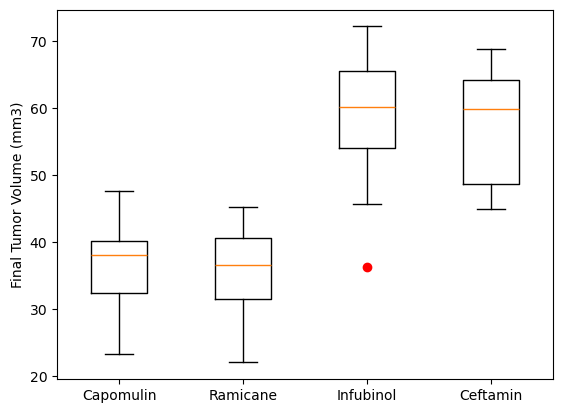

In [71]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
drugdata = [drugs_df[drugs[0]],
            drugs_df[drugs[1]],
            drugs_df[drugs[2]],
            drugs_df[drugs[3]]]

fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(drugdata, labels=drugs, sym="r")
plt.show()

## Line and Scatter Plots

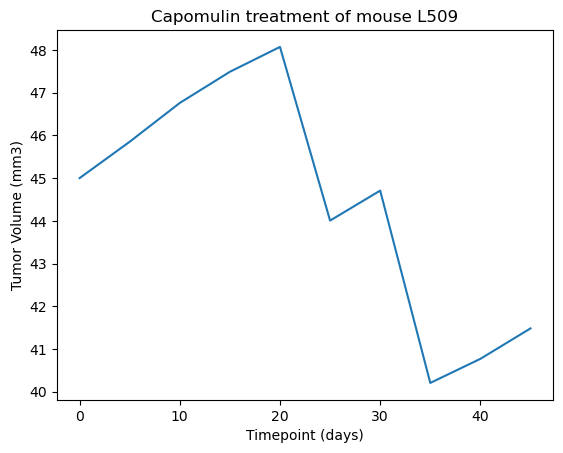

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
l509_df.head()
x_axis = l509_df["Timepoint"]
y_axis = l509_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()

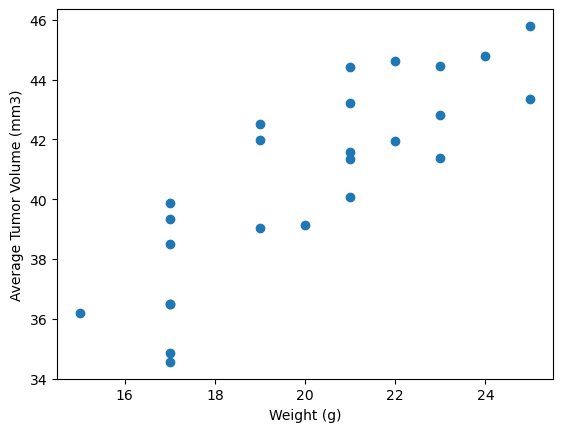

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_drug_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_avg_weight = cap_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
cap_avg_size = cap_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(cap_avg_weight, cap_avg_size)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation between avg. mouse weight and avg. tumor size under Capomulin is 0.84.
y = 0.95x + 21.55


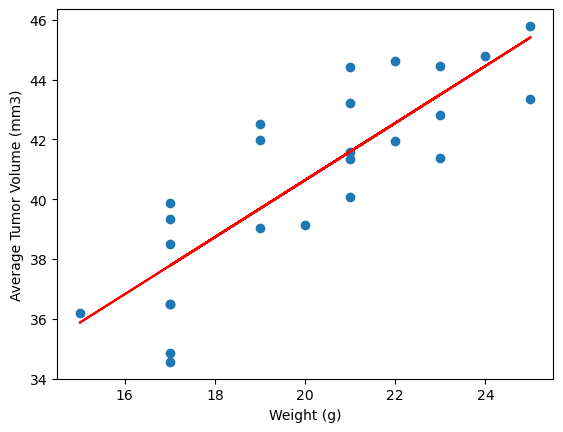

In [74]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(cap_avg_size, cap_avg_weight)[0], 2)
print(f"Correlation between avg. mouse weight and avg. tumor size under Capomulin is {corr}.")
x_data = cap_avg_weight
y_data = cap_avg_size
slope, intercept, r, p, stderr = st.linregress(x_data, y_data)
regress = slope * x_data + intercept
print(f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

# Plot regression line on previous scatter graph
plt.scatter(x_data, y_data)
plt.plot(x_data, regress, color="r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()